In [1]:
import warnings
import numpy   as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings(action='ignore',category=FitFailedWarning)
warnings.filterwarnings(action='ignore',category=UserWarning)

In [3]:
data = pd.read_csv(r'datasets/DiabetesPrediction/diabetes_prediction_dataset.csv')

In [4]:
data.head(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0


&nbsp;
O nível de HbA1c (hemoglobina A1c) é uma medida do nível médio de açúcar no sangue de uma pessoa nos últimos 2-3 meses. Níveis mais altos

&nbsp;

# Analise dos dados

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Verificando valores nulos no meu conjunto de dados

In [7]:
data.loc[ data.isna().any(axis=1) ]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [8]:
data.loc[ data.isna().any(axis=1) ]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


### Diabetes

In [9]:
countDiabetes = data['diabetes'].value_counts().reset_index(name='quantidade')

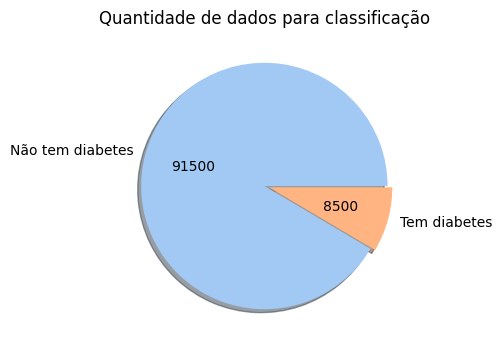

In [10]:
plt.figure(figsize=(5,4))
plt.pie( x = countDiabetes['quantidade'], explode=(0,0.04) , labels = ['Não tem diabetes','Tem diabetes'],autopct=lambda x: '{:.0f}'.format(x*countDiabetes['quantidade'].sum()/100) ,colors=sea.color_palette('pastel')[0:2],shadow=True)
plt.title('Quantidade de dados para classificação')
plt.show()

Os atributo `Diabetes` está desbalanceados com isso para a classificação se faz necessário o balaceamento dele. \
Como as pessoas que não tem diabetes está em mais quantidade ( muito mais) do que as que tem diabetes , irei fazer UnderSampling para o balanceamento dos dados.  

### Gender

In [11]:
data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [12]:
data.loc[data['gender']=='Other'][['diabetes','hypertension','heart_disease','smoking_history']].value_counts().reset_index()

,diabetes,hypertension,heart_disease,smoking_history,count
0,0,0,0,not current,8
1,0,0,0,No Info,6
2,0,0,0,never,3
3,0,0,0,ever,1


In [13]:
print('Média de idade para pessoas de outro gênero :',data.loc[data['gender']=='Other']['age'].mean())

Média de idade para pessoas de outro gênero : 29.555555555555557


Esses dados para pessoa `gender` == `other` são redundantes, os valores dos atributos `hypertension` , `heart_disease` em relação `diabete` não muda continua 0, além de não mudar o valor do atributo `diabetes` continua zero. \
Com isso será removido do conjunto de dados.

In [14]:
data.drop( index = data.loc[ data['gender'] == 'Other'].index , inplace = True )

In [15]:
countGender = data['gender'].value_counts().reset_index(name='Quantidade')

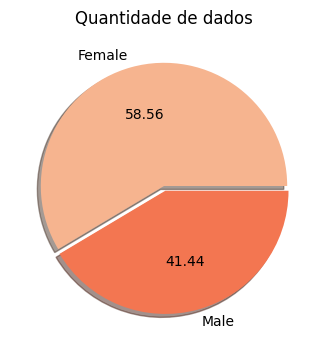

In [16]:
plt.figure(figsize=(10,4))
plt.pie( x = countGender['Quantidade'], explode=(0,0.04) , labels = countGender['gender'] ,colors = sea.color_palette('rocket_r')[0:2] , autopct='%.2f' ,shadow=True )
plt.title('Quantidade de dados')
plt.show()

Possui muito mais dados do genero feminino que o masculino. 

In [17]:
countGenderDiabetes = data.groupby( by=['gender','diabetes'] )['age'].mean().reset_index(name='Média de idade')

In [18]:
SelectDiatebes0 = data.loc[data['diabetes'] == 0][['age','gender']]
SelectDiatebes1 = data.loc[data['diabetes'] == 1][['age','gender']]

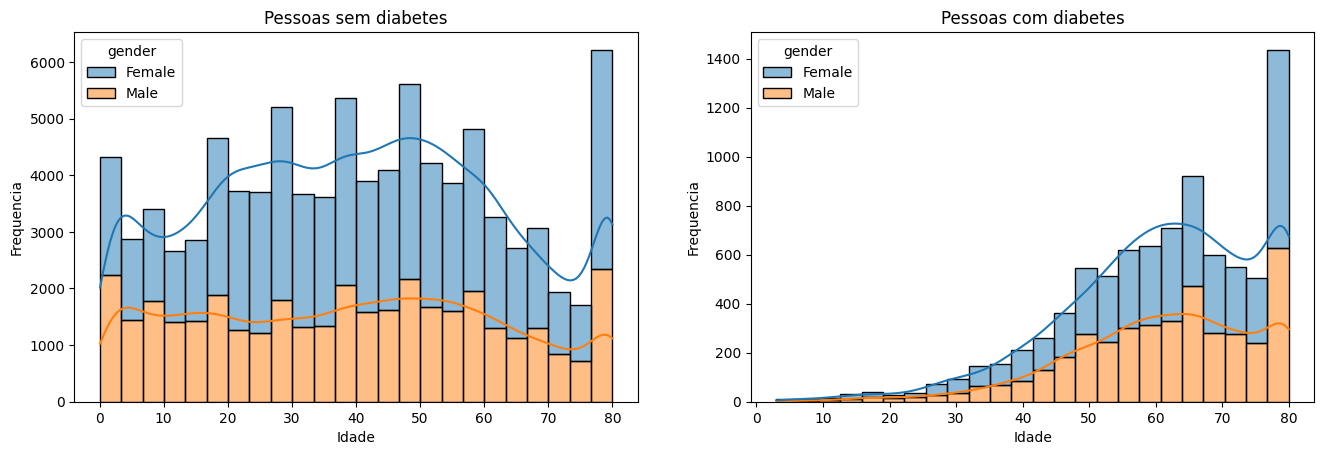

In [19]:
fig , ax = plt.subplots(1,2)
fig.set_figwidth(16)

#Sem diabetes
sea.histplot(
    x = SelectDiatebes0['age'], hue = SelectDiatebes0['gender'] , ax = ax[0] ,multiple="stack", 
    kde = True, shrink = 1 , bins = 24
)
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Frequencia')
ax[0].set_title('Pessoas sem diabetes')

# Com diabetes
sea.histplot(
    x = SelectDiatebes1['age'], hue = SelectDiatebes1['gender'], ax = ax[1] , multiple="stack", 
    kde= True, shrink=1, bins = 24
)
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Frequencia')
ax[1].set_title('Pessoas com diabetes')

plt.show()

In [20]:
groupGenHype = data.groupby( by = ['gender'])['hypertension'].value_counts().reset_index(name = 'Quantidade')

In [21]:
groupGenHeart = data.groupby( by = ['gender'])['heart_disease'].value_counts().reset_index(name = 'Quantidade')

In [22]:
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

groupGenHype['hypertension'].loc[groupGenHype['hypertension'] == 0]     = 'Não tem hipertensão'
groupGenHype['hypertension'].loc[groupGenHype['hypertension'] == 1]     = 'Tem hipertensão'
groupGenHeart['heart_disease'].loc[groupGenHeart['heart_disease'] == 0] = 'Não doença cardiaca'
groupGenHeart['heart_disease'].loc[groupGenHeart['heart_disease'] == 1] = 'Tem doençã cardiaca'

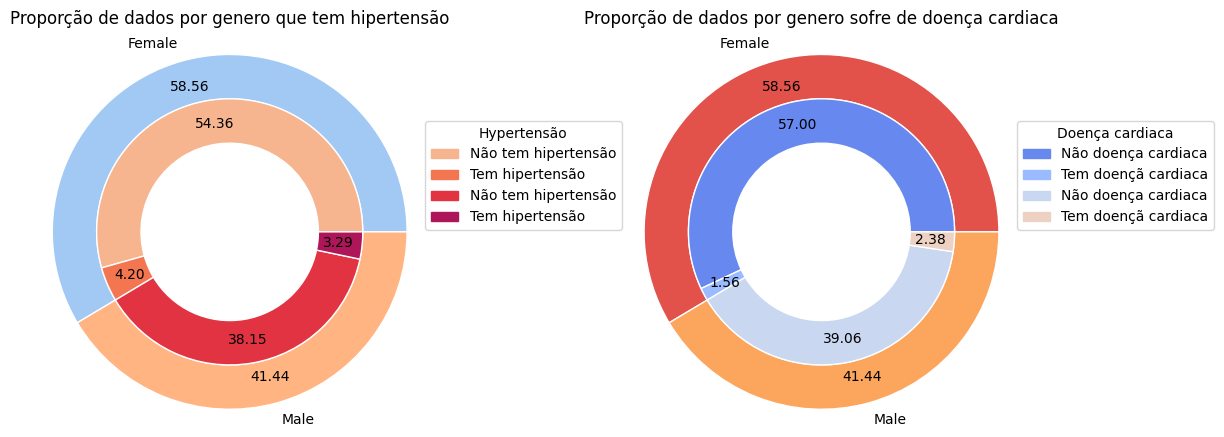

In [23]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(14)
colors1 = sea.color_palette('pastel')[0:2] 
colors2H = sea.color_palette('rocket_r')[0:4] 


ax[0].pie(x = groupGenHype.groupby(by=['gender'])['Quantidade'].sum(), labels= groupGenHype['gender'].drop_duplicates().values ,
       wedgeprops = dict(width=0.3, edgecolor='w'), autopct='%.2f' , pctdistance =0.85 ,colors=colors1 ,radius=1.2)

ax[0].pie(x = groupGenHype.groupby(by=['gender','hypertension'])['Quantidade'].sum() ,wedgeprops=dict(width=0.3, edgecolor='w'),
       radius=.9,autopct='%.2f',pctdistance=0.82 ,colors=colors2H )

colors1 = sea.color_palette('Spectral')[0:2]
colors2 = sea.color_palette('coolwarm')[0:6] 

ax[1].pie(x = groupGenHeart.groupby(by=['gender'])['Quantidade'].sum(), labels= groupGenHype['gender'].drop_duplicates().values ,
       wedgeprops = dict(width=0.3, edgecolor='w'), autopct='%.2f' , pctdistance =0.85 ,colors=colors1 ,radius=1.2)

ax[1].pie(x = groupGenHeart.groupby(by=['gender','heart_disease'])['Quantidade'].sum() ,wedgeprops=dict(width=0.3, edgecolor='w'),
       radius=.9,autopct='%.2f',pctdistance=0.82 ,colors=colors2 )

legends = []
for value, color in zip(groupGenHype['hypertension'].values, colors2H): 
       legends.append(mpatches.Patch(color=color, label=value))

legends2 = []
for value, color in zip(groupGenHeart['heart_disease'].values, colors2): 
       legends2.append(mpatches.Patch(color=color, label=value))

ax[0].legend(title='Hypertensão'    ,handles=legends, bbox_to_anchor=(1.01,0.519,0,0.3))
ax[1].legend(title='Doença cardiaca',handles=legends2, bbox_to_anchor=(1.01,0.519,0,0.3))

ax[0].set_title('Proporção de dados por genero que tem hipertensão',y=1.04)
ax[1].set_title('Proporção de dados por genero sofre de doença cardiaca',y=1.04)

plt.show()

In [24]:
genderGroupby =data.loc[data['diabetes']==1].groupby(by=['gender','hypertension','heart_disease'])['age'].apply(lambda x:x).reset_index()

In [25]:
genderGroupby = pd.concat([genderGroupby.drop(columns='age'),pd.cut(genderGroupby['age'],20)],axis=1)
genderGroupby.head(3)

,gender,hypertension,heart_disease,level_3,age
0,Female,0,0,6,"(41.5, 45.35]"
1,Female,0,0,53,"(49.2, 53.05]"
2,Female,0,0,59,"(64.6, 68.45]"


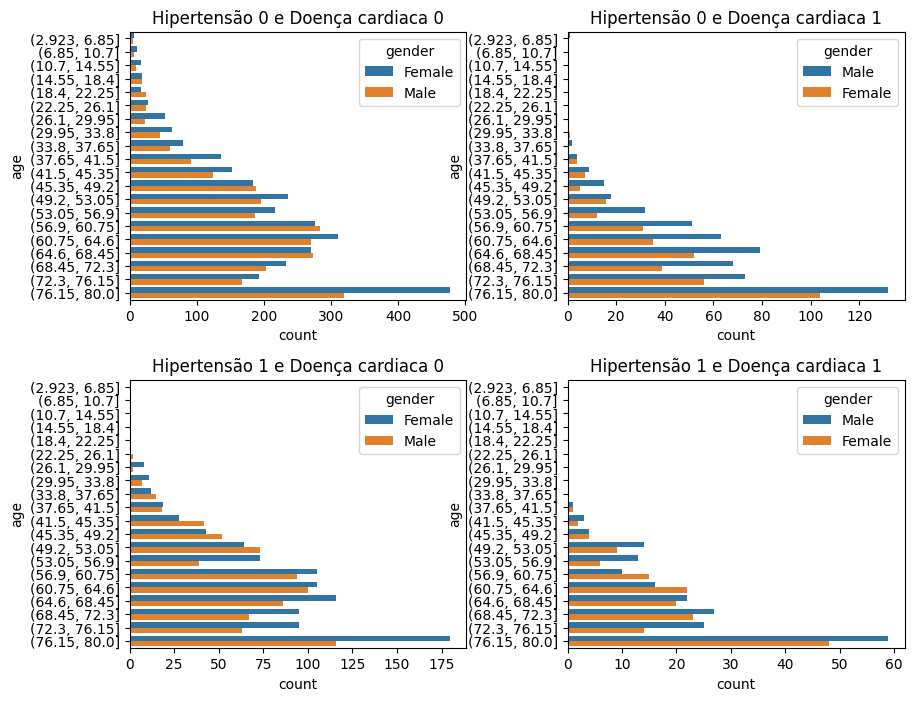

In [26]:
from itertools import product
fig , ax = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(8)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in list(product([0,1],repeat=2)):
    select = genderGroupby.loc[ (genderGroupby['hypertension' ]== i[0]) & (genderGroupby['heart_disease']== i[1])
                                ][['age','gender']].value_counts().reset_index() 
    
    ax[i[0],i[1]].set_title(f'Hipertensão {i[0]} e Doença cardiaca {i[1]}')
    sea.barplot(x=select['count'],y=select['age'],hue=select['gender'],orient='h',ax=ax[i[0],i[1]])

> Esse grafico assima e para as pessoas que tem diabetes

### Hipertensão

[]

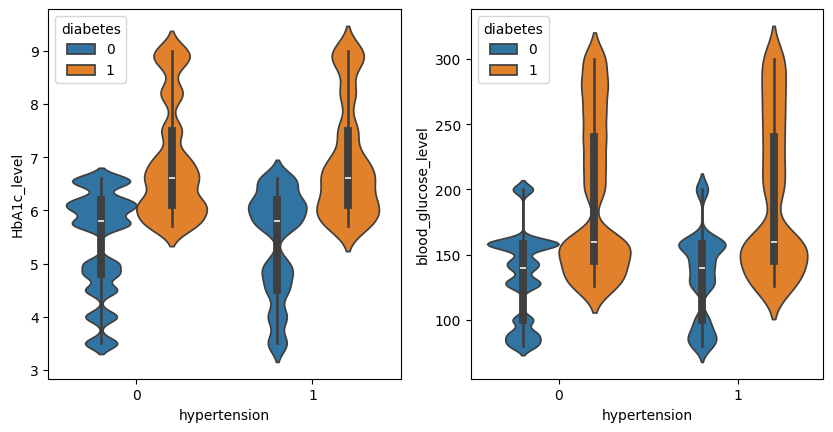

In [27]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(10)
sea.violinplot(x = data['hypertension'] , y= data['HbA1c_level'] , hue=data['diabetes'] ,ax = ax[0])
sea.violinplot(x = data['hypertension'] ,y= data['blood_glucose_level'] , hue=data['diabetes'], ax= ax[1])
plt.plot()

In [28]:
data.groupby( by = ['smoking_history' ,'diabetes'] ).size().apply(lambda x:(x*100)/data['smoking_history'].count()).reset_index(name='%')

,smoking_history,diabetes,%
0,No Info,0,34.362185
1,No Info,1,1.454262
2,current,0,8.339501
3,current,1,0.948171
4,ever,0,3.531636
5,ever,1,0.472085
6,former,0,7.763397
7,former,1,1.590286
8,never,0,31.751715
9,never,1,3.346602


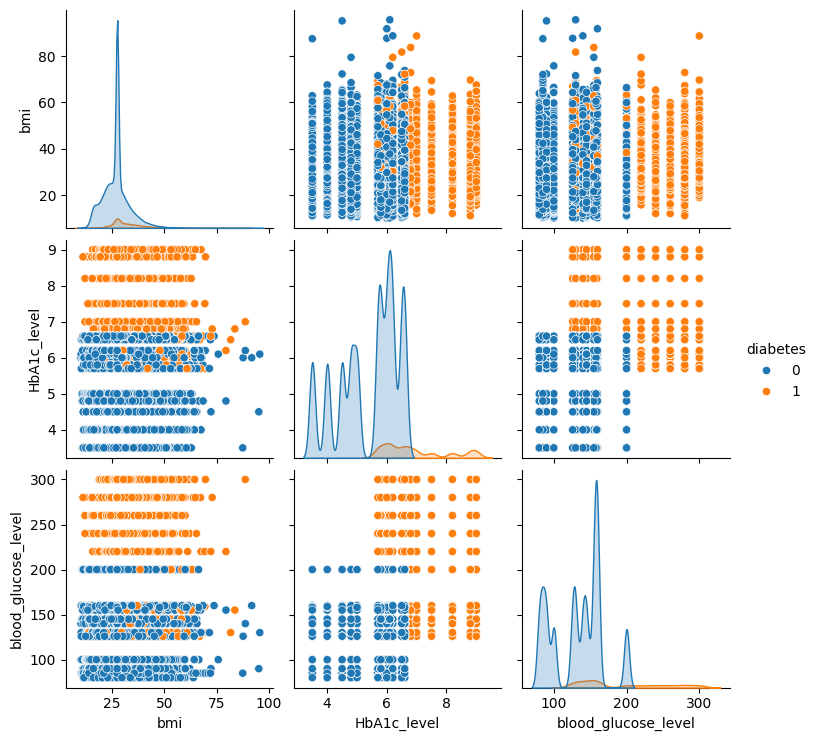

In [29]:
sea.pairplot(data[['diabetes','bmi','HbA1c_level','blood_glucose_level']],hue='diabetes')
plt.show()

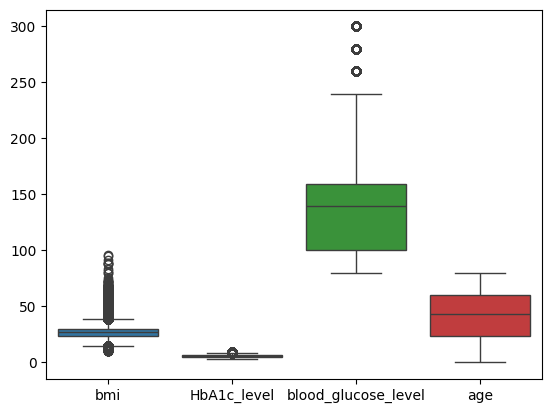

In [30]:
sea.boxplot(data[['bmi','HbA1c_level','blood_glucose_level','age']])
plt.show()

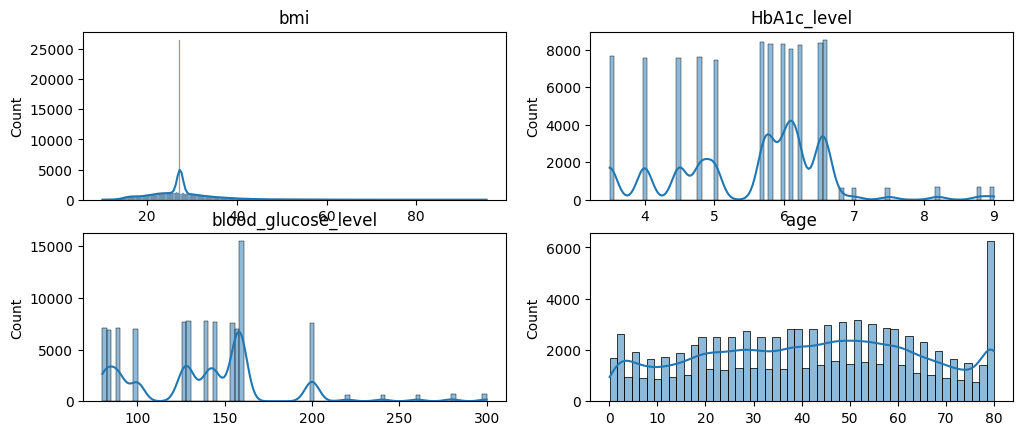

In [31]:
fig , ax = plt.subplots(2,2)
index = 0
lista = ['bmi','HbA1c_level','blood_glucose_level','age']

fig.set_figwidth(12)
for i in range(2):
    for j in range(2):
        ax[i,j].set_title(lista[index])
        sea.histplot( data[lista[index]].values,kde=True,ax=ax[i,j])
        index +=1
plt.show()

> para esse atributos se faz necessario a remoção de outlier, normalizar os dados \
_futuro_

&nbsp;

&nbsp;

# Classificação

In [32]:
from sklearn.metrics         import *
from sklearn.preprocessing   import LabelBinarizer,LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score , 
    GridSearchCV    , 
    RandomizedSearchCV , 
    StratifiedKFold
)

In [33]:
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree         import DecisionTreeClassifier,export_graphviz
from sklearn.svm          import SVC
from graphviz             import Source

In [34]:
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier      import ROCAUC

In [35]:
data = pd.read_csv(r'datasets/DiabetesPrediction/diabetes_prediction_dataset.csv')

### Preprocessamento

In [36]:
classeGender = LabelBinarizer()
data['gender'] = classeGender.fit_transform(data['gender'])

In [37]:
classSmoking = LabelEncoder()
data['smoking_history'] = classSmoking.fit_transform(data['smoking_history'])

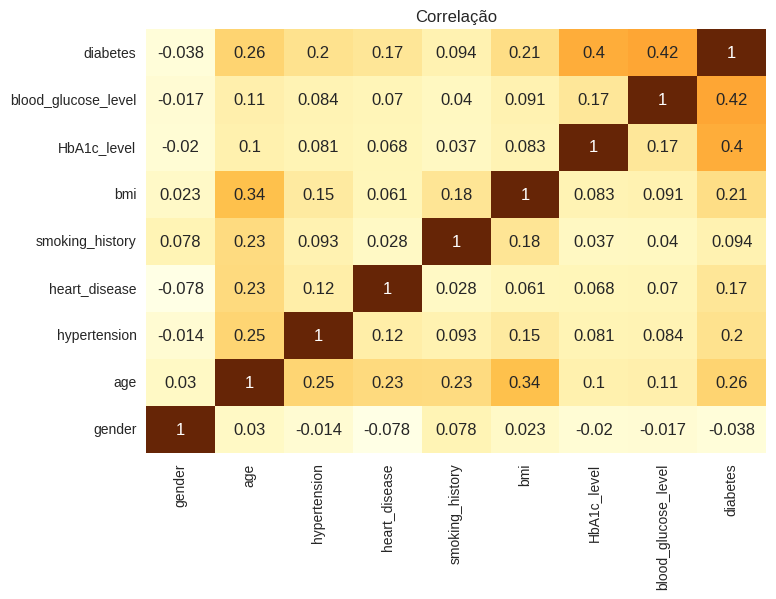

In [38]:
sea.heatmap(data.corr()[::-1],annot=True,cmap='YlOrBr',cbar=False)
plt.title('Correlação')
plt.show()

In [39]:
dataset = pd.get_dummies(data,columns=['smoking_history','gender','hypertension','heart_disease'],dtype=int)

### Padronização

In [40]:
dataset[
    ['bmi','HbA1c_level','blood_glucose_level','age']
        ] = StandardScaler().fit_transform(dataset[['bmi','HbA1c_level','blood_glucose_level','age']])

In [41]:
dataset.head(4)

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_0,smoking_history_1,smoking_history_2,smoking_history_3,smoking_history_4,smoking_history_5,gender_0,gender_1,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,1.692704,-0.321056,1.001706,0.047704,0,0,0,0,0,1,0,0,1,1,0,0,1
1,0.538006,-0.000116,1.001706,-1.426210,0,1,0,0,0,0,0,0,1,1,0,1,0
2,-0.616691,-0.000116,0.161108,0.489878,0,0,0,0,0,1,0,1,0,1,0,1,0
3,-0.261399,-0.583232,-0.492690,0.416183,0,0,1,0,0,0,0,0,1,1,0,1,0


### UnderSampling
Balanceando os dados, há mais dados `0` não tem diabetes do que `1` tem diabetes

In [42]:
from imblearn.under_sampling import RandomUnderSampler

In [43]:
under = RandomUnderSampler(sampling_strategy = 'majority' , random_state=42)

In [44]:
X = dataset.drop( columns = ['diabetes'])
Y = dataset['diabetes']
Y.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [45]:
xUnder ,yUnder = under.fit_resample(X,Y)

In [46]:
yUnder.value_counts()

diabetes
0    8500
1    8500
Name: count, dtype: int64

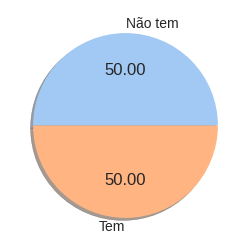

In [47]:
p = yUnder.value_counts().reset_index()
plt.figure(figsize=(4,3))
plt.pie( x = p['count'] , labels=['Não tem','Tem'],autopct='%.2f',colors=sea.color_palette('pastel'),shadow=True)
plt.show()

### Dividindo dados de teste e treinamento

In [48]:
xtrain , xtest , ytrain , ytest = train_test_split( xUnder, yUnder.values , test_size=0.20 , random_state=42)

### KNN
Vou ver o melhor parametros para knn e depois fazer a validação cruzada do mesmo

In [49]:
params = {
    'n_neighbors':[10,11],
    'weights'    :['uniform','distance'],
    'algorithm'  :['ball_tree','kd_tree'],
    'p'     :[3,5,7]
}
crossKnn = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=params,scoring='accuracy',n_iter=3)
crossKnn.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=3,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'n_neighbors': [10, 11], 'p': [3, 5, 7],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [50]:
print("Melhor estimador:\n",crossKnn.best_estimator_)
print(crossKnn.best_score_)

Melhor estimador:
 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10, p=3,
                     weights='distance')
0.8856617647058824


In [51]:
knn = crossKnn.best_estimator_
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10, p=3,
                     weights='distance')

In [52]:
pred = knn.predict(xtest)

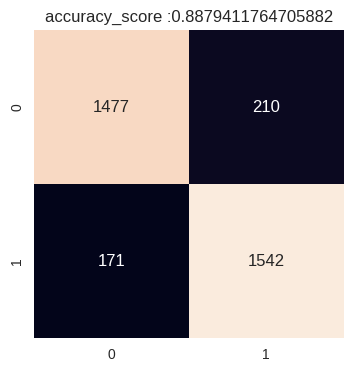

In [53]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,pred)}')
plt.show()

In [54]:
print(classification_report(ytest,pred))
print('f1_score',f1_score(ytest,pred))
print('Recall',recall_score(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1687
           1       0.88      0.90      0.89      1713

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400

f1_score 0.89004329004329
Recall 0.9001751313485113


In [55]:
kfold = StratifiedKFold(n_splits=5)
cross_val_score(knn,xUnder,yUnder,cv=kfold,scoring='accuracy')

array([0.89294118, 0.88970588, 0.88029412, 0.88911765, 0.88558824])

#### Gradiente Descedente

In [56]:
params = dict(
    alpha    = np.around(np.linspace(0.1,1,10),2),
    l1_ratio = np.around(np.linspace(0.1,0.9,8),1),
)

gridGrad = GridSearchCV(SGDClassifier(learning_rate='optimal',penalty='elasticnet',eta0=1),param_grid=params,scoring='accuracy',cv=5) 
gridGrad.fit(xtrain,ytrain)

print(gridGrad.best_estimator_)
print(gridGrad.best_score_)

SGDClassifier(alpha=0.1, eta0=1, l1_ratio=0.1, penalty='elasticnet')
0.8845588235294117


In [57]:
grad = gridGrad.best_estimator_
grad.fit(xtrain,ytrain)
predGrad = grad.predict(xtest)

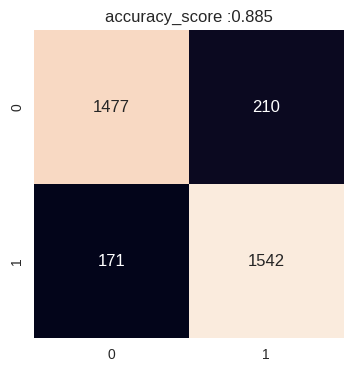

In [58]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,predGrad)}')
plt.show()

In [59]:
print(classification_report(ytest,predGrad))
print('f1_score',f1_score(ytest,predGrad))
print('Recall',recall_score(ytest,predGrad))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1687
           1       0.89      0.89      0.89      1713

    accuracy                           0.89      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.89      0.88      3400

f1_score 0.8859725867599884
Recall 0.8867483946293053


&nbsp;

#### Árvore de decisão

In [60]:
params = dict(
    max_depth    = np.arange(3,30),
    max_features = [10],
    max_leaf_nodes = [100,150,200],
    min_samples_split = [150,200]
    
)
gridTree = GridSearchCV(DecisionTreeClassifier(criterion='entropy'),param_grid=params,scoring='accuracy')
gridTree.fit(xtrain,ytrain)

print('Melhor Parametro para o algoritmo:\n',gridTree.best_estimator_)
print(gridTree.best_score_)

Melhor Parametro para o algoritmo:
 DecisionTreeClassifier(criterion='entropy', max_depth=23, max_features=10,
                       max_leaf_nodes=100, min_samples_split=150)
0.9087500000000001


In [61]:
tree =  DecisionTreeClassifier(criterion='entropy', max_depth=19, max_features=10,max_leaf_nodes=200, min_samples_split=150)
tree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=19, max_features=10,
                       max_leaf_nodes=200, min_samples_split=150)

In [62]:
tree.get_depth(),tree.get_n_leaves(),tree.tree_.node_count

(19, 86, 171)

In [63]:
pred = tree.predict(xtest)

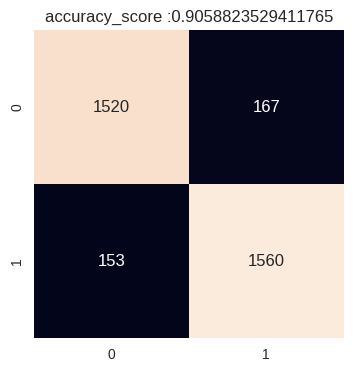

In [64]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,pred)}')
plt.show()

In [65]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1687
           1       0.90      0.91      0.91      1713

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [66]:
print('f1_score',f1_score(ytest,pred))
print('Recall',recall_score(ytest,pred))

f1_score 0.9069767441860465
Recall 0.9106830122591943


In [67]:
kfold = StratifiedKFold(n_splits=5)
cross_val_score(tree,xUnder,yUnder,cv=kfold,scoring='accuracy')

array([0.91529412, 0.90529412, 0.89352941, 0.90529412, 0.90911765])

&nbsp;

#### Regressão Logistica

In [68]:
logistic = LogisticRegression(penalty='l2',solver='newton-cholesky',l1_ratio=1,max_iter=1000,tol=1e-6)
logistic.fit(xtrain,ytrain)

LogisticRegression(l1_ratio=1, max_iter=1000, solver='newton-cholesky',
                   tol=1e-06)

In [69]:
pred = logistic.predict(xtest)

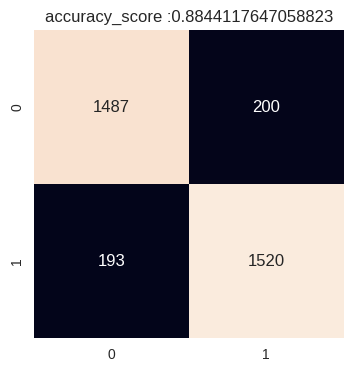

In [70]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,pred)}')
plt.show()

In [71]:
print(classification_report(ytest,pred))
print('f1_score',f1_score(ytest,pred))
print('Recall',recall_score(ytest,pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1687
           1       0.88      0.89      0.89      1713

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400

f1_score 0.8855228662976988
Recall 0.8873321657910099


In [72]:
kfold = StratifiedKFold(n_splits=5)
cross_val_score(logistic,xUnder,yUnder,cv=kfold,scoring='accuracy')

array([0.89264706, 0.88735294, 0.875     , 0.89147059, 0.88647059])

&nbsp;

#### SVM

In [73]:
params = dict(
    C = np.linspace(1,4,4),
)
gridSvm = GridSearchCV(SVC(kernel='poly',coef0=0,degree=3),param_grid=params ,scoring='accuracy')
gridSvm.fit(xtrain,ytrain)

print(gridSvm.best_estimator_)
print(gridSvm.best_score_)

SVC(C=4.0, coef0=0, kernel='poly')
0.9030882352941176


In [74]:
svm = gridSvm.best_estimator_
svm.fit(xtrain,ytrain)
predSvm = svm.predict(xtest)

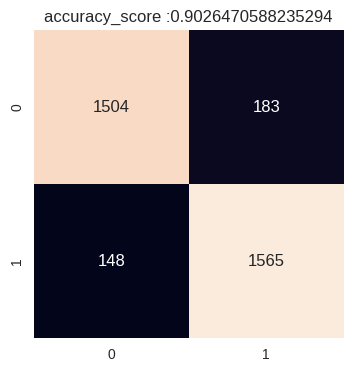

In [75]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,predSvm), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,predSvm)}')
plt.show()

In [76]:
print(classification_report(ytest,predSvm))
print('f1_score',    f1_score(ytest,predSvm))
print('Recall'  ,recall_score(ytest,predSvm))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1687
           1       0.90      0.91      0.90      1713

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400

f1_score 0.9043629008956949
Recall 0.9136018680677175


In [77]:
kfold = StratifiedKFold(n_splits=5)
cross_val_score(svm,xUnder,yUnder,cv=kfold,scoring='accuracy')

array([0.90823529, 0.91029412, 0.89588235, 0.89970588, 0.90411765])

> Melhor acuracia foi na  SVM

#### Ensemble

In [78]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators = [
        ('tree'     ,tree),
        ('svm'      ,SVC(kernel='poly',coef0=0,degree=3,probability=True)),
        ('logistics',LogisticRegression(solver='liblinear',max_iter=300))
    ],
    voting='soft'
)

voting.fit(xtrain,ytrain)
predVot = voting.predict(xtest)

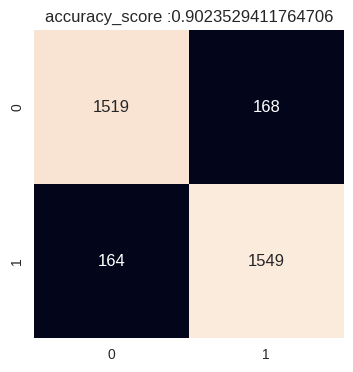

In [79]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,predVot), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,predVot)}')
plt.show()

In [80]:
print(classification_report(ytest,predVot))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1687
           1       0.90      0.90      0.90      1713

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [81]:
kfold = StratifiedKFold(n_splits=5)
cross_val_score(voting,xUnder,yUnder,cv=kfold,scoring='accuracy')

array([0.91176471, 0.90647059, 0.89235294, 0.9       , 0.90352941])

In [82]:
import joblib
joblib.dump(svm,'Model/ModelDiabetes.pki')

['Model/ModelDiabetes.pki']

&nbsp;

## Redes Neurais

In [83]:
dataset.shape[1]/2

8.5

In [84]:
import keras
from   keras.models import Sequential
from   keras.layers import Dense

2023-12-01 23:20:46.962616: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 23:20:47.200085: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 23:20:47.200187: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 23:20:47.238276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 23:20:47.338800: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 23:20:47.340411: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [85]:
model = Sequential()
model.add(
    Dense(17, activation='relu')
)
model.add(
    Dense(4 , activation='relu')
)
model.add(
    Dense(4 , activation='relu')
)
model.add(
    Dense(1 , activation='sigmoid')
)

In [86]:
model.compile( optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])

In [87]:
model.fit(xtrain,ytrain,batch_size=20,epochs=100)

Epoch 1/100
680/680 [==============================] - 4s 3ms/step - loss: 0.3369 - accuracy: 0.8521
Epoch 2/100
680/680 [==============================] - 2s 3ms/step - loss: 0.2480 - accuracy: 0.8843
Epoch 3/100
680/680 [==============================] - 2s 3ms/step - loss: 0.2417 - accuracy: 0.8864
Epoch 4/100
680/680 [==============================] - 2s 3ms/step - loss: 0.2331 - accuracy: 0.8910
Epoch 5/100
680/680 [==============================] - 2s 3ms/step - loss: 0.2231 - accuracy: 0.8935
Epoch 6/100
680/680 [==============================] - 2s 3ms/step - loss: 0.2150 - accuracy: 0.8974
Epoch 7/100
680/680 [==============================] - 2s 3ms/step - loss: 0.2082 - accuracy: 0.9010
Epoch 8/100
680/680 [==============================] - 2s 3ms/step - loss: 0.2038 - accuracy: 0.9021
Epoch 9/100
680/680 [==============================] - 2s 2ms/step - loss: 0.1998 - accuracy: 0.9015
Epoch 10/100
680/680 [==============================] - 2s 3ms/step - loss: 0.1967 - accura

In [88]:
pred = model.predict(xtest)>0.5

107/107 [==============================] - 0s 796us/step


In [89]:
accuracy_score(ytest,pred)

0.9038235294117647

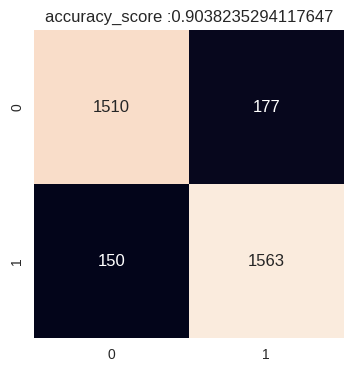

In [90]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,pred), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,pred)}')
plt.show()

In [91]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1687
           1       0.90      0.91      0.91      1713

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400

